In [1]:
import pandas as pd
import os
import json
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import PIL
import PIL.Image

In [2]:
images_path = r'C:\Users\uriks\PycharmProjects\Identification-of-drawings\data\dataset\dataset\testing_data\images'
annotations_path = r'C:\Users\uriks\PycharmProjects\Identification-of-drawings\data\dataset\dataset\testing_data\annotations'

In [3]:
df = pd.DataFrame()
for fill_name in os.listdir(annotations_path):
    path = f"{annotations_path}/{fill_name}"
    name = fill_name.split('.')[0]
    f = open(path, encoding="utf-8")
    data = json.load(f)
    info_df = pd.json_normalize(data['form'])
    info_df['fil_name'] = name
    df = df.append(info_df)
df

,box,text,label,words,linking,id,fil_name
0,"[61, 127, 143, 211]",,other,"[{'box': [61, 127, 143, 211], 'text': ''}]",[],0,82092117
1,"[102, 345, 129, 359]",TO:,question,"[{'box': [102, 345, 129, 359], 'text': 'TO:'}]","[[1, 14]]",1,82092117
2,"[102, 406, 147, 423]",DATE:,question,"[{'box': [102, 406, 147, 423], 'text': 'DATE:'}]","[[2, 27]]",2,82092117
3,"[461, 440, 475, 455]",3,answer,"[{'box': [461, 440, 475, 455], 'text': '3'}]","[[19, 3]]",3,82092117
4,"[249, 84, 274, 98]",Fax:,question,"[{'box': [249, 84, 274, 98], 'text': 'Fax:'}]","[[4, 7]]",4,82092117
...,...,...,...,...,...,...,...
42,"[447, 701, 579, 714]",The space is being brdered by:,question,"[{'text': 'The', 'box': [447, 703, 467, 711]},...",[],42,93106788
43,"[448, 722, 577, 734]",LOAILLARD MEDIA SERVICES,other,"[{'text': 'LOAILLARD', 'box': [448, 723, 497, ...",[],43,93106788
44,"[447, 751, 622, 773]",Direct all invoices and full checking copies o...,other,"[{'text': 'Direct', 'box': [448, 751, 472, 764...",[],44,93106788
45,"[448, 785, 605, 828]",LORILLARD MEDIA SERVICES ONE PARK AVENUE 17TH ...,other,"[{'text': 'LORILLARD', 'box': [448, 785, 497, ...",[],45,93106788


In [17]:
labl_filtr = (df.label == 'other')&(df.text.str.contains('(^\d{5,10})|(\d{5,10}$)'))
df[labl_filtr]

C:\Users\uriks\AppData\Local\Temp/ipykernel_13788/1217538901.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  labl_filtr = (df.label == 'other')&(df.text.str.contains('(^\d{5,10})|(\d{5,10}$)'))


,box,text,label,words,linking,id,fil_name
6,"[633, 775, 653, 874]",82092117,other,"[{'box': [633, 775, 653, 874], 'text': '820921...",[],6,82092117
22,"[675, 774, 696, 879]",82200067,other,"[{'box': [675, 774, 696, 879], 'text': '822000...",[],22,82200067_0069
11,"[680, 814, 698, 917]",82250337,other,"[{'box': [680, 814, 698, 917], 'text': '822503...",[],11,82250337_0338
10,"[680, 832, 702, 941]",82251504,other,"[{'box': [680, 832, 702, 941], 'text': '822515...",[],10,82251504
12,"[695, 787, 719, 895]",82252956,other,"[{'box': [695, 787, 719, 895], 'text': '822529...",[],12,82252956_2958
0,"[570, 901, 672, 928]",82253058,other,"[{'box': [570, 901, 672, 928], 'text': '822530...",[],0,82253058_3059
13,"[218, 60, 303, 73]",317 8450977,other,"[{'text': '', 'box': [218, 60, 232, 73]}, {'te...",[],13,82253058_3059
21,"[691, 784, 709, 885]",82253245,other,"[{'box': [691, 784, 709, 885], 'text': '822532...",[],21,82253245_3247
42,"[694, 796, 712, 901]",82253362,other,"[{'box': [694, 796, 712, 901], 'text': '822533...",[],42,82253362_3364
9,"[676, 768, 698, 870]",82254765,other,"[{'box': [676, 768, 698, 870], 'text': '822547...",[],9,82254765


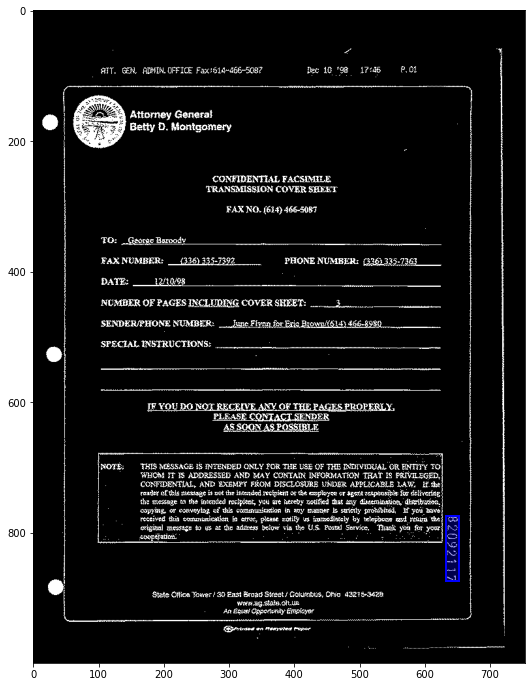

[False  True]


In [19]:
for name in df.fil_name.unique():
    im = np.array(PIL.Image.open(f'{images_path}/{name}.png').convert("1")
                 )
    fig,ax = plt.subplots(figsize=(12, 12))
    plt.imshow(im, cmap="binary")
    for lb in df[(df.fil_name == name)&labl_filtr]['box']:
        x = lb[0]
        y = lb[1]
        w = lb[2] - lb[0]
        h = lb[3] - lb[1]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, lw = 2,
                                 fc ='b', facecolor='none',alpha = 0.3)
        ax.add_patch(rect)
        rect = patches.Rectangle((x, y), w, h, lw=2,
                                 ec ='b', facecolor='none')
        ax.add_patch(rect)
    plt.show()
    print(np.unique(im))
    break  